In [1]:

import os
if not os.path.exists('GTSRB'):
  %pip install -U -q torch_snippets
  !wget -qq https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
  !wget -qq https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
  !unzip -qq GTSRB_Final_Training_Images.zip
  !unzip -qq GTSRB_Final_Test_Images.zip
  !wget https://raw.githubusercontent.com/georgesung/traffic_sign_classification_german/master/signnames.csv
  !rm GTSRB_Final_Training_Images.zip GTSRB_Final_Test_Images.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.3/110.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.0/221.0 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 82.6 MB/s eta 0:00:00
--2025-10-21 08:01:14--  https://raw.githubusercontent.com/georgesung/traffic_sign_cla

In [24]:
from torch_snippets import *
classIds = pd.read_csv('signnames.csv')
classIds.set_index('ClassId', inplace=True)
classIds = classIds.to_dict()['SignName']
classIds = {f'{k:05d}':v for k, v in classIds.items()}
id2int = {v:ix for ix, (k, v) in enumerate(classIds.items())}

In [22]:
classIds

{'00000': 'Speed limit (20km/h)',
 '00001': 'Speed limit (30km/h)',
 '00002': 'Speed limit (50km/h)',
 '00003': 'Speed limit (60km/h)',
 '00004': 'Speed limit (70km/h)',
 '00005': 'Speed limit (80km/h)',
 '00006': 'End of speed limit (80km/h)',
 '00007': 'Speed limit (100km/h)',
 '00008': 'Speed limit (120km/h)',
 '00009': 'No passing',
 '00010': 'No passing for vechiles over 3.5 metric tons',
 '00011': 'Right-of-way at the next intersection',
 '00012': 'Priority road',
 '00013': 'Yield',
 '00014': 'Stop',
 '00015': 'No vechiles',
 '00016': 'Vechiles over 3.5 metric tons prohibited',
 '00017': 'No entry',
 '00018': 'General caution',
 '00019': 'Dangerous curve to the left',
 '00020': 'Dangerous curve to the right',
 '00021': 'Double curve',
 '00022': 'Bumpy road',
 '00023': 'Slippery road',
 '00024': 'Road narrows on the right',
 '00025': 'Road work',
 '00026': 'Traffic signals',
 '00027': 'Pedestrians',
 '00028': 'Children crossing',
 '00029': 'Bicycles crossing',
 '00030': 'Beware of

In [23]:
id2int

{'Speed limit (20km/h)': 0,
 'Speed limit (30km/h)': 1,
 'Speed limit (50km/h)': 2,
 'Speed limit (60km/h)': 3,
 'Speed limit (70km/h)': 4,
 'Speed limit (80km/h)': 5,
 'End of speed limit (80km/h)': 6,
 'Speed limit (100km/h)': 7,
 'Speed limit (120km/h)': 8,
 'No passing': 9,
 'No passing for vechiles over 3.5 metric tons': 10,
 'Right-of-way at the next intersection': 11,
 'Priority road': 12,
 'Yield': 13,
 'Stop': 14,
 'No vechiles': 15,
 'Vechiles over 3.5 metric tons prohibited': 16,
 'No entry': 17,
 'General caution': 18,
 'Dangerous curve to the left': 19,
 'Dangerous curve to the right': 20,
 'Double curve': 21,
 'Bumpy road': 22,
 'Slippery road': 23,
 'Road narrows on the right': 24,
 'Road work': 25,
 'Traffic signals': 26,
 'Pedestrians': 27,
 'Children crossing': 28,
 'Bicycles crossing': 29,
 'Beware of ice/snow': 30,
 'Wild animals crossing': 31,
 'End of all speed and passing limits': 32,
 'Turn right ahead': 33,
 'Turn left ahead': 34,
 'Ahead only': 35,
 'Go straig

In [25]:

from torchvision import transforms as T
trn_tfms = T.Compose([
    T.ToPILImage(),
    T.Resize(32),
    T.CenterCrop(32),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

val_tfms = T.Compose([
    T.ToPILImage(),
    T.Resize(32),
    T.CenterCrop(32),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]),
])

In [38]:
class GTSRB(Dataset):
  """face landmarks dataset"""
  def __init__(self, files, transform):
    super().__init__()
    self.files = files
    self.transform = transform

  def __len__(self):
    return len(self.files)

  def __getitem__(self, ix):
    try:
      fpath = self.files[ix]
      clss = fname(parent(fpath))
      img = read(fpath, 1)
      return img, classIds[clss]
    except:
      Warn(f"Missing {fpath}. Loading a diff image")
      return self[randint(len(self))]

  def choose(self):
    return self[randint(len(self))]

  def collate_fn(self, batch):
    imgs, classes = list(zip(*batch))
    if self.transform:
      imgs = [self.transform(img)[None] for img in imgs]
    classes = [torch.tensor([id2int[clss]]) for clss in classes]
    imgs, classes = [torch.cat(i).to(device) for i in [imgs, classes]]
    return imgs, classes

In [39]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
all_files = Glob('GTSRB/Final_Training/Images/*/*.ppm')
np.random.seed(10)
np.random.shuffle(all_files)

from sklearn.model_selection import train_test_split
trn_files, val_files = train_test_split(all_files, random_state=1)

trn_ds = GTSRB(trn_files, transform=trn_tfms)
val_ds = GTSRB(val_files, transform=val_tfms)
trn_dl = DataLoader(trn_ds, 32, shuffle=True, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, 32, shuffle=False, collate_fn=val_ds.collate_fn)

In [40]:
import torchvision.models as models

def convBlock(ni, no):
  return nn.Sequential(
      nn.Dropout(0.2),
      nn.Conv2d(ni, no, kernel_size=3, padding=1),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(2),
    )

In [41]:
class SignClassifier(nn.Module):
  def __init__(self):
      super().__init__()
      self.model = nn.Sequential(
          convBlock(3, 64),
          convBlock(64, 64),
          convBlock(64, 128),
          convBlock(128, 64),
          nn.Flatten(),
          nn.Linear(256, 256),
          nn.Dropout(0.2),
          nn.ReLU(inplace=True),
          nn.Linear(256, len(id2int))
      )
      self.loss_fn = nn.CrossEntropyLoss()

  def forward(self, x):
      return self.model(x)

  def compute_metrics(self, preds, targets):
      ce_loss = self.loss_fn(preds, targets)
      acc = (torch.max(preds, 1)[1] == targets).float().mean()
      return ce_loss, acc

In [42]:
def train_batch(model, data, optimizer, criterion):
  ims, labels = data
  _preds = model(ims)
  optimizer.zero_grad()
  loss, acc = criterion(_preds, labels)
  loss.backward()
  optimizer.step()
  return loss.item(), acc.item()

In [43]:

@torch.no_grad()
def validate_batch(model, data, criterion):
  ims, labels = data
  _preds = model(ims)
  loss, acc = criterion(_preds, labels)
  return loss.item(), acc.item()

In [44]:
model = SignClassifier().to(device)
criterion = model.compute_metrics
optimizer = optim.Adam(model.parameters(), lr=1e-3)
n_epochs = 40

EPOCH: 1.000  trn_acc: 0.299  trn_loss: 2.393  val_loss: 1.450  val_acc: 0.538  (24.24s - 945.19s remaining)
EPOCH: 2.000  trn_acc: 0.660  trn_loss: 1.023  val_loss: 0.861  val_acc: 0.714  (46.95s - 892.13s remaining)
EPOCH: 3.000  trn_acc: 0.781  trn_loss: 0.668  val_loss: 0.565  val_acc: 0.812  (69.42s - 856.14s remaining)
EPOCH: 4.000  trn_acc: 0.824  trn_loss: 0.530  val_loss: 0.541  val_acc: 0.829  (91.92s - 827.26s remaining)
EPOCH: 5.000  trn_acc: 0.850  trn_loss: 0.453  val_loss: 0.458  val_acc: 0.854  (114.00s - 797.97s remaining)
EPOCH: 6.000  trn_acc: 0.871  trn_loss: 0.401  val_loss: 0.383  val_acc: 0.876  (136.37s - 772.77s remaining)
EPOCH: 7.000  trn_acc: 0.879  trn_loss: 0.374  val_loss: 0.393  val_acc: 0.875  (158.59s - 747.64s remaining)
EPOCH: 8.000  trn_acc: 0.888  trn_loss: 0.343  val_loss: 0.336  val_acc: 0.893  (180.95s - 723.81s remaining)
EPOCH: 9.000  trn_acc: 0.897  trn_loss: 0.322  val_loss: 0.346  val_acc: 0.889  (203.65s - 701.47s remaining)
EPOCH: 10.000 

100%|██████████| 141/141 [00:02<00:00, 68.70it/s] 


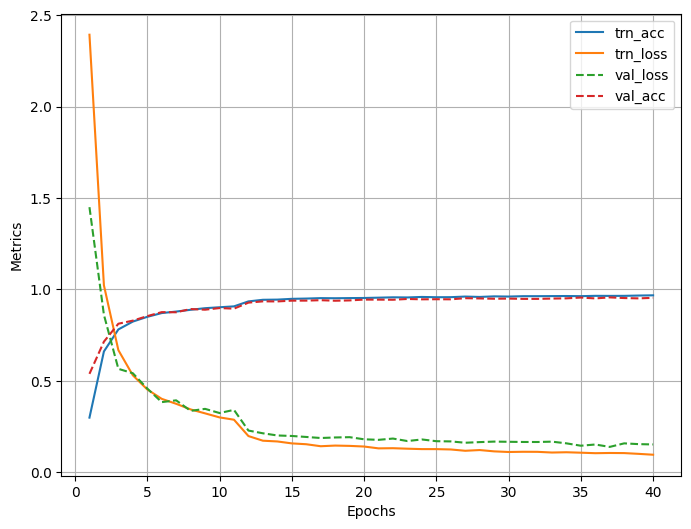

[10/21/25 08:38:12] INFO     Dumped object of size ≈2 MB @ "no-aug-no-bn.log" in 1.13e+00 seconds                              ]8;id=639755;file:///tmp/ipython-input-2361036308.py:17\ipython-input-2361036308.py]8;;\:<cell line: 0>:17

» no-aug-no-bn.log

In [45]:
log = Report(n_epochs)
for ex in range(n_epochs):
  N = len(trn_dl)
  for bx, data in enumerate(trn_dl):
      loss, acc = train_batch(model, data, optimizer, criterion)
      log.record(ex+(bx+1)/N, trn_loss=loss, trn_acc=acc, end='\r')

  N = len(val_dl)
  for bx, data in enumerate(val_dl):
      loss, acc = validate_batch(model, data, criterion)
      log.record(ex+(bx+1)/N, val_loss=loss, val_acc=acc, end='\r')

  log.report_avgs(ex+1)
  if ex == 10: optimizer = optim.Adam(model.parameters(), lr=1e-4)

log.plot_epochs()
dumpdill(log, 'no-aug-no-bn.log')

In [46]:
def convBlock(ni, no):
  return nn.Sequential(
      nn.Dropout(0.2),
      nn.Conv2d(ni, no, kernel_size=3, padding=1),
      nn.ReLU(inplace=True),
      nn.BatchNorm2d(no),
      nn.MaxPool2d(2),
   )

class SignClassifier(nn.Module):
  def __init__(self):
      super().__init__()
      self.model = nn.Sequential(
          convBlock(3, 64),
          convBlock(64, 64),
          convBlock(64, 128),
          convBlock(128, 64),
          nn.Flatten(),
          nn.Linear(256, 256),
          nn.Dropout(0.2),
          nn.ReLU(inplace=True),
          nn.Linear(256, len(id2int))
      )
      self.loss_fn = nn.CrossEntropyLoss()

  def forward(self, x):
      return self.model(x)

  def compute_metrics(self, preds, targets):
      ce_loss = self.loss_fn(preds, targets)
      acc = (torch.max(preds, 1)[1] == targets).float().mean()
      return ce_loss, acc

In [47]:
model = SignClassifier().to(device)

EPOCH: 1.000  trn_acc: 0.027  trn_loss: 3.855  val_loss: 3.856  val_acc: 0.029  (22.69s - 884.88s remaining)
EPOCH: 2.000  trn_acc: 0.028  trn_loss: 3.854  val_loss: 3.857  val_acc: 0.030  (45.18s - 858.43s remaining)
EPOCH: 3.000  trn_acc: 0.028  trn_loss: 3.854  val_loss: 3.860  val_acc: 0.027  (67.21s - 828.87s remaining)
EPOCH: 4.000  trn_acc: 0.028  trn_loss: 3.854  val_loss: 3.858  val_acc: 0.030  (89.08s - 801.76s remaining)
EPOCH: 5.000  trn_acc: 0.028  trn_loss: 3.854  val_loss: 3.854  val_acc: 0.028  (111.35s - 779.45s remaining)
EPOCH: 6.000  trn_acc: 0.027  trn_loss: 3.861  val_loss: 3.856  val_acc: 0.030  (133.78s - 758.06s remaining)
EPOCH: 7.000  trn_acc: 0.028  trn_loss: 3.855  val_loss: 3.857  val_acc: 0.029  (156.47s - 737.65s remaining)
EPOCH: 8.000  trn_acc: 0.028  trn_loss: 3.855  val_loss: 3.852  val_acc: 0.029  (178.99s - 715.94s remaining)
EPOCH: 9.000  trn_acc: 0.027  trn_loss: 3.857  val_loss: 3.859  val_acc: 0.029  (201.64s - 694.52s remaining)
EPOCH: 10.000 

100%|██████████| 141/141 [00:02<00:00, 67.41it/s] 


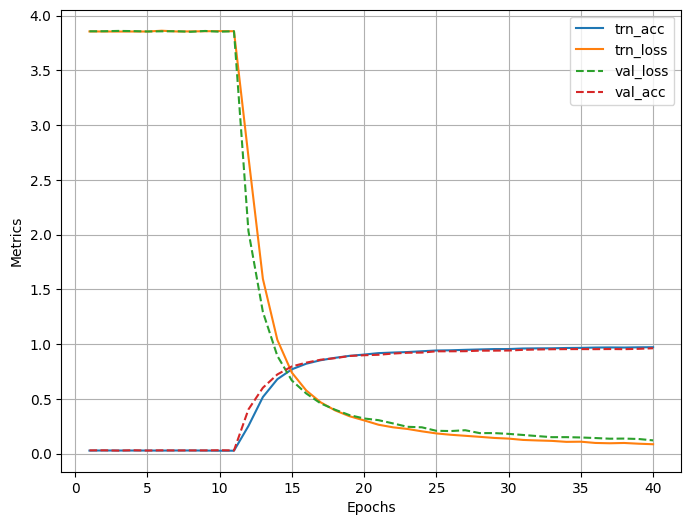

[10/21/25 08:53:19] INFO     Dumped object of size ≈2 MB @ "no-aug-yes-bn.log" in 1.13e+00 seconds                             ]8;id=624677;file:///tmp/ipython-input-2084534012.py:19\ipython-input-2084534012.py]8;;\:<cell line: 0>:19

» no-aug-yes-bn.log

In [48]:
n_epochs = 40

log = Report(n_epochs)
for ex in range(n_epochs):
    N = len(trn_dl)
    for bx, data in enumerate(trn_dl):
        loss, acc = train_batch(model, data, optimizer, criterion)
        log.record(ex+(bx+1)/N, trn_loss=loss, trn_acc=acc, end='\r')

    N = len(val_dl)
    for bx, data in enumerate(val_dl):
        loss, acc = validate_batch(model, data, criterion)
        log.record(ex+(bx+1)/N, val_loss=loss, val_acc=acc, end='\r')

    log.report_avgs(ex+1)
    if ex == 10: optimizer = optim.Adam(model.parameters(), lr=1e-4)

log.plot_epochs()
dumpdill(log, 'no-aug-yes-bn.log')

In [49]:
trn_tfms = T.Compose([
  T.ToPILImage(),
  T.Resize(32),
  T.CenterCrop(32),
  T.ColorJitter(brightness=(0.8,1.2),
  contrast=(0.8,1.2),
  saturation=(0.8,1.2),
  hue=0.25),
  T.RandomAffine(5, translate=(0.01,0.1)),
  T.ToTensor(),
  T.Normalize(mean=[0.485, 0.456, 0.406],
              std=[0.229, 0.224, 0.225]),
])

val_tfms = T.Compose([
  T.ToPILImage(),
  T.Resize(32),
  T.CenterCrop(32),
  T.ToTensor(),
  T.Normalize(mean=[0.485, 0.456, 0.406],
              std=[0.229, 0.224, 0.225]),
])

In [51]:
trn_files, val_files = train_test_split(all_files, random_state=1)

trn_ds = GTSRB(trn_files, transform=trn_tfms)
val_ds = GTSRB(val_files, transform=val_tfms)
trn_dl = DataLoader(trn_ds, 32, shuffle=True, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, 32, shuffle=False, collate_fn=val_ds.collate_fn)

In [52]:
def convBlock(ni, no):
  return nn.Sequential(
      nn.Dropout(0.2),
      nn.Conv2d(ni, no, kernel_size=3, padding=1),
      nn.ReLU(inplace=True),
      nn.BatchNorm2d(no),
      nn.MaxPool2d(2),
    )

class SignClassifier(nn.Module):
  def __init__(self):
      super().__init__()
      self.model = nn.Sequential(
          convBlock(3, 64),
          convBlock(64, 64),
          convBlock(64, 128),
          convBlock(128, 64),
          nn.Flatten(),
          nn.Linear(256, 256),
          nn.Dropout(0.2),
          nn.ReLU(inplace=True),
          nn.Linear(256, len(id2int))
      )
      self.loss_fn = nn.CrossEntropyLoss()

  def forward(self, x):
      return self.model(x)

  def compute_metrics(self, preds, targets):
      ce_loss = self.loss_fn(preds, targets)
      acc = (torch.max(preds, 1)[1] == targets).float().mean()
      return ce_loss, acc

In [53]:
model = SignClassifier().to(device)
criterion = model.compute_metrics

EPOCH: 1.000  trn_acc: 0.028  trn_loss: 3.790  val_loss: 3.785  val_acc: 0.030  (41.66s - 1624.84s remaining)
EPOCH: 2.000  trn_acc: 0.028  trn_loss: 3.790  val_loss: 3.789  val_acc: 0.028  (82.60s - 1569.33s remaining)
EPOCH: 3.000  trn_acc: 0.029  trn_loss: 3.790  val_loss: 3.786  val_acc: 0.030  (124.00s - 1529.34s remaining)
EPOCH: 4.000  trn_acc: 0.029  trn_loss: 3.787  val_loss: 3.786  val_acc: 0.027  (165.42s - 1488.79s remaining)
EPOCH: 5.000  trn_acc: 0.030  trn_loss: 3.789  val_loss: 3.785  val_acc: 0.030  (206.42s - 1444.91s remaining)
EPOCH: 6.000  trn_acc: 0.029  trn_loss: 3.788  val_loss: 3.786  val_acc: 0.027  (248.36s - 1407.38s remaining)
EPOCH: 7.000  trn_acc: 0.029  trn_loss: 3.792  val_loss: 3.784  val_acc: 0.029  (289.25s - 1363.60s remaining)
EPOCH: 8.000  trn_acc: 0.028  trn_loss: 3.791  val_loss: 3.782  val_acc: 0.030  (330.56s - 1322.25s remaining)
EPOCH: 9.000  trn_acc: 0.029  trn_loss: 3.791  val_loss: 3.783  val_acc: 0.029  (371.32s - 1279.00s remaining)
EPO

100%|██████████| 141/141 [00:02<00:00, 67.94it/s] 


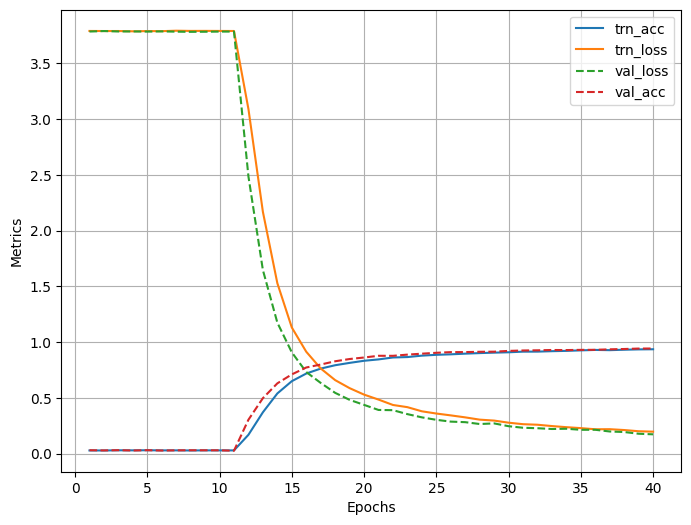

[10/21/25 09:22:40] INFO     Dumped object of size ≈2 MB @ "40-yes-aug-yes-bn.log" in 1.14e+00 seconds                          ]8;id=97903;file:///tmp/ipython-input-380792471.py:19\ipython-input-380792471.py]8;;\:<cell line: 0>:19

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
n_epochs = 40

log = Report(n_epochs)
for ex in range(n_epochs):
    N = len(trn_dl)
    for bx, data in enumerate(trn_dl):
        loss, acc = train_batch(model, data, optimizer, criterion)
        log.record(ex+(bx+1)/N, trn_loss=loss, trn_acc=acc, end='\r')

    N = len(val_dl)
    for bx, data in enumerate(val_dl):
        loss, acc = validate_batch(model, data, criterion)
        log.record(ex+(bx+1)/N, val_loss=loss, val_acc=acc, end='\r')

    log.report_avgs(ex+1)
    if ex == 10: optimizer = optim.Adam(model.parameters(), lr=1e-4)

log.plot_epochs()
dumpdill(log, '40-yes-aug-yes-bn.log')
from google.colab import files
files.download('40-yes-aug-yes-bn.log')


EPOCH: 20.000  trn_acc: 0.953  trn_loss: 0.140  val_loss: 0.180  val_acc: 0.944  (3603.28s - 3603.28s remaining)


100%|██████████| 141/141 [00:00<00:00, 152.39it/s]


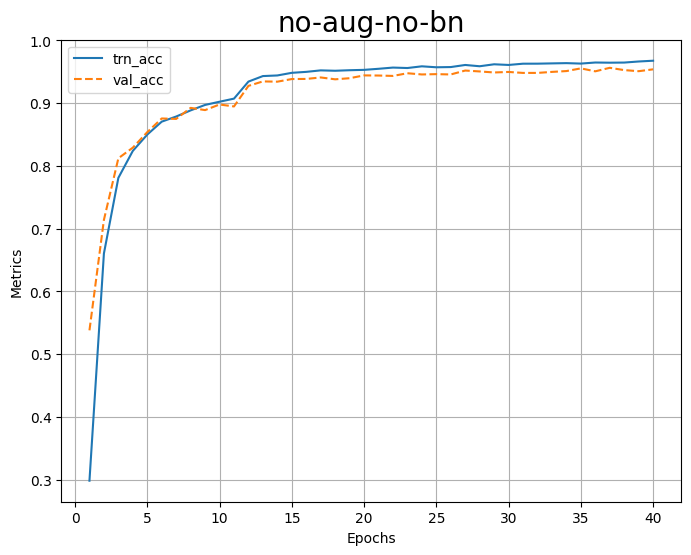


══════════════════════════════════════════════════════════════════

EPOCH: 20.000  trn_acc: 0.904  trn_loss: 0.303  val_loss: 0.321  val_acc: 0.898  (2668.93s - 2668.93s remaining)


100%|██████████| 141/141 [00:01<00:00, 123.92it/s]


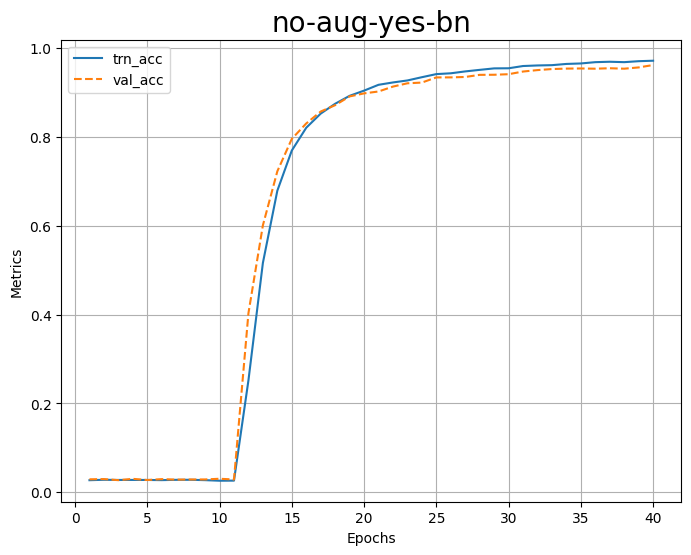


══════════════════════════════════════════════════════════════════

EPOCH: 20.000  trn_acc: 0.832  trn_loss: 0.529  val_loss: 0.437  val_acc: 0.861  (1647.04s - 1647.04s remaining)


100%|██████████| 141/141 [00:01<00:00, 82.58it/s] 


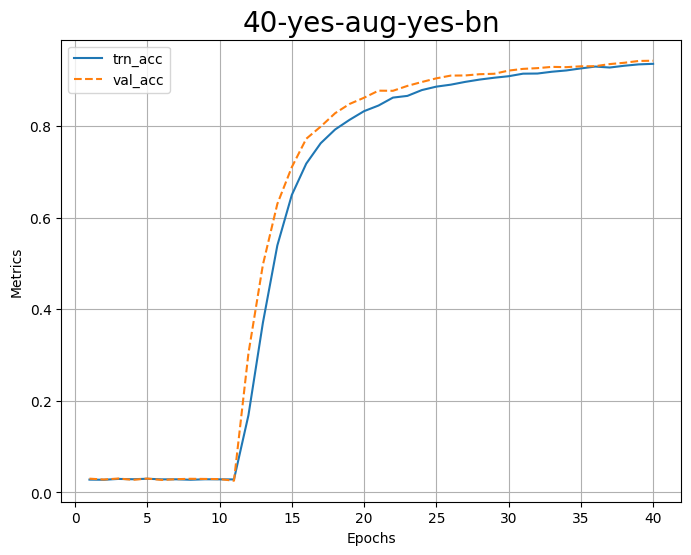


══════════════════════════════════════════════════════════════════


In [55]:
for f in Glob('*.log'):
    log = loaddill(f)
    print()
    log.report_avgs(20)
    log.plot_epochs(['trn_acc', 'val_acc'], title=str(f).replace(',','\n').replace('.log',''))
    print()
    line()